In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
original_img_dir = 'dataset/original_dataset/images/render'

In [4]:

images = [os.path.join(original_img_dir, x) for x in sorted(os.listdir(original_img_dir))]


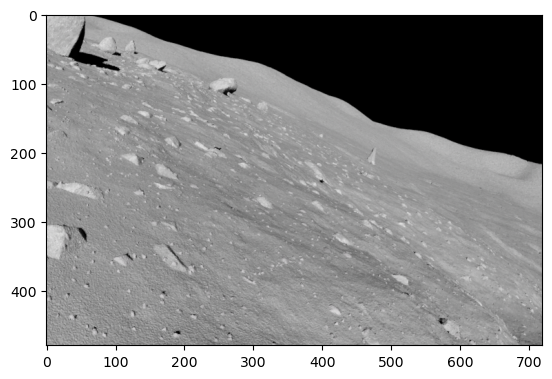

In [5]:
img_path = images[38]


img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(img)
plt.show()


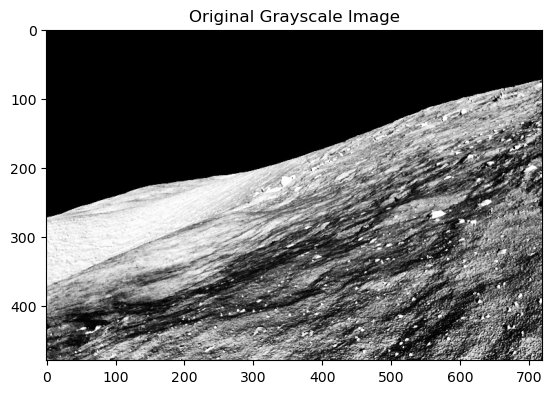

In [17]:


# img_path = 'dataset/original_dataset/images/render'

img_demo = img_path = images[11]
#104

img_demo = cv2.imread(img_path)


plt.subplot(1, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_demo, cmap='gray')


gray_img = cv2.cvtColor(img_demo, cv2.COLOR_BGR2GRAY)

img_demo = cv2.equalizeHist(gray_img)

plt.subplot(1, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_demo, cmap='gray')

output_path = "~/tudelft/"
cv2.imwrite(output_path, img_demo)


In [8]:
def relative_to_absolute(bbox, img_shape):
    img_h, img_w = img_shape[:2]
    x, y, w, h = bbox
    abs_x = int((x-w/2) * img_w)
    abs_y = int((y - h/2) * img_h)
    abs_w = int(w * img_w)
    abs_h = int(h * img_h)
    return abs_x, abs_y, abs_w, abs_h

def draw_bounding_boxes(image, bboxes):
    for bbox in bboxes:
        x, y, w, h = bbox
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image


In [9]:
csv_file = "bbox_data.csv"  # Replace with your CSV file path
data = pd.read_csv(csv_file, header=0)

grouped_df = data.groupby(data.columns[0]) 
print(grouped_df.get_group('render0002.png'))

            image  center_x  center_y     width    height
1  render0002.png  0.684028  0.943750  0.154167  0.112500
2  render0002.png  0.125000  0.759375  0.080556  0.093750
3  render0002.png  0.085417  0.510417  0.034722  0.050000
4  render0002.png  0.188889  0.398958  0.052778  0.064583
5  render0002.png  0.917361  0.453125  0.165278  0.268750
6  render0002.png  0.697917  0.355208  0.062500  0.085417
7  render0002.png  0.506250  0.291667  0.029167  0.037500
8  render0002.png  0.993056  0.009375  0.013889  0.018750
9  render0002.png  0.577778  0.017708  0.127778  0.035417


[(0, 459, 33, 21), (710, 448, 9, 30), (168, 442, 68, 37), (323, 435, 56, 45), (569, 421, 131, 57), (695, 406, 24, 33), (620, 392, 40, 28), (135, 357, 30, 22), (0, 350, 42, 36), (195, 349, 133, 90), (85, 341, 15, 15), (367, 338, 155, 75), (661, 327, 29, 28), (0, 322, 12, 24), (154, 315, 22, 24), (208, 313, 48, 21), (33, 308, 58, 36), (543, 302, 41, 30), (417, 297, 45, 24), (158, 297, 18, 16), (586, 294, 55, 36), (701, 293, 18, 45), (0, 274, 24, 24), (108, 272, 40, 22), (699, 271, 15, 15), (197, 265, 64, 30), (482, 263, 22, 18), (527, 258, 19, 18), (373, 255, 54, 24), (57, 244, 34, 21), (468, 231, 18, 18), (204, 220, 15, 15), (356, 208, 25, 21), (298, 203, 39, 30), (42, 196, 45, 51), (352, 169, 66, 30), (278, 157, 32, 21), (635, 147, 25, 25), (208, 133, 30, 27), (430, 84, 193, 108)]


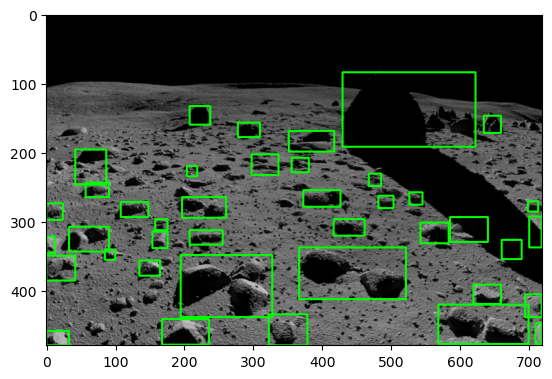

In [10]:
bboxes = []
img_path = 'dataset/original_dataset/images/render/render0085.png'
img =  cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for bbox in grouped_df.get_group('render0085.png').values:
    # print(bbox[1:])    
    bboxes.append(relative_to_absolute(bbox[1:], img.shape))

print([bbox for bbox in bboxes])
absolute_bboxes = [bbox_coords for bbox_coords in bboxes]
# image_with_bboxes = draw_bounding_boxes(img, absolute_bboxes)
# plt.imshow(image_with_bboxes)
# plt.imshow(draw_bounding_boxes(img, absolute_bboxes))
# plt.show()

# print(bbox_coords for bbox_coords in bboxes)
# absolute_bboxes = [print(bbox_coords, img.shape) for bbox_coords in [bboxes]]
image_with_bboxes = draw_bounding_boxes(img.copy(), absolute_bboxes)
plt.imshow(image_with_bboxes)
plt.show()

(480, 720, 3)


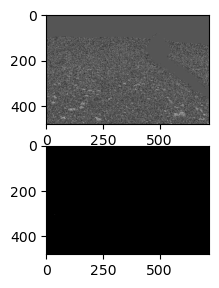

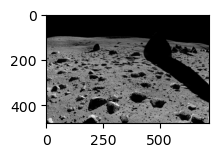

In [11]:
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
print(yuv_img.shape)

plt.subplot(3, 1, 1)
plt.imshow(yuv_img[:,:,2], cmap='gray')
plt.subplot(3, 1, 2)
plt.imshow(yuv_img[:,:,1], cmap='gray')
plt.show()
plt.subplot(3, 1, 3)
plt.imshow(yuv_img[:,:,0], cmap='gray')
plt.show()

(480, 720)


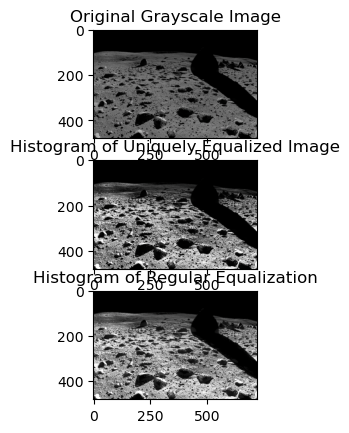

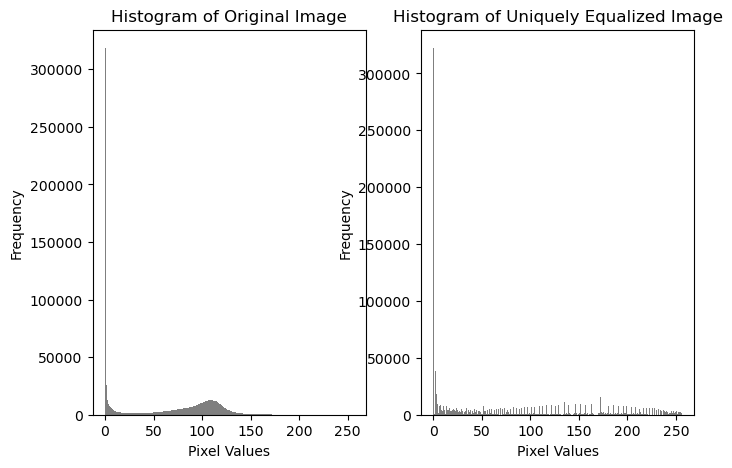

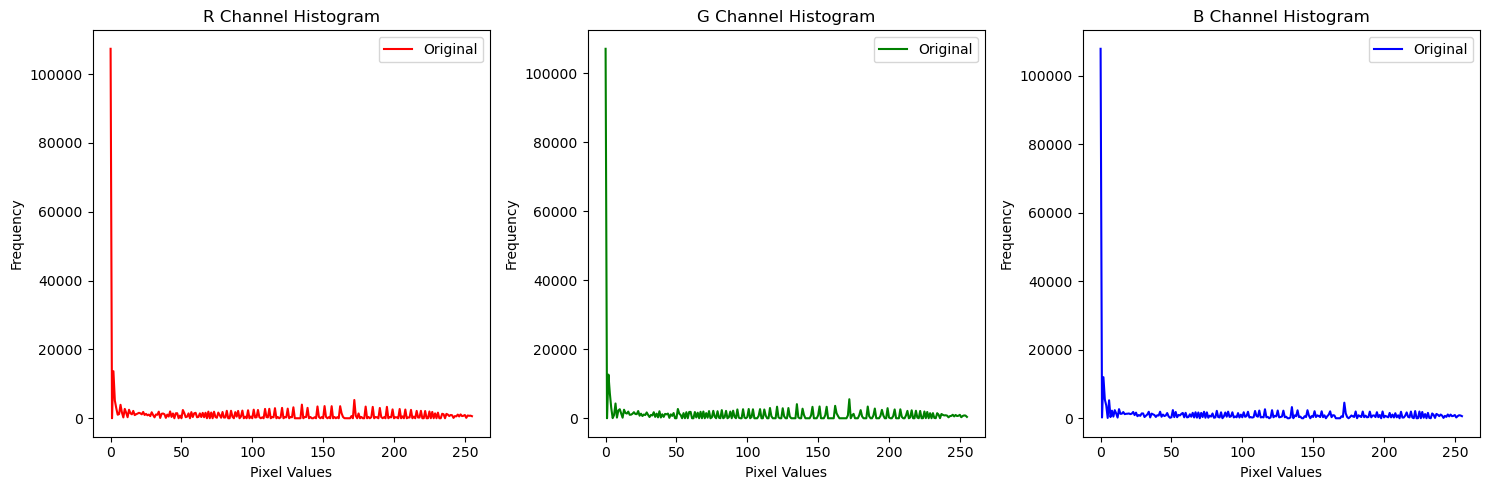

'"\nFinal Conclusion:\n\nSince the channels are mostly grey, \nand brightness is a function of the colours, any attempt of\nusing existing conversions to YUV or similar will result in a\nwidely inaccurate image as the data is inadvertently manipulated with\nthe brightness.\n\nTherefore-> Will convert all images to black and white instead\n\nThis is thought to improve the model as:\n\n1. 1/3 of amount of information required\n2. No loss of actually useful information\n3. Ability to perform accurate histogram equalization\n'

In [12]:
# yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# reg_eq_yuv = yuv_img
# reg_eq_yuv[:,:,0] = cv2.equalizeHist(yuv_img[:,:,0])

# regular_eq_img = cv2.cvtColor(reg_eq_yuv, cv2.COLOR_YCrCb2BGR)



lab_house = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Apply histogram equalization to the L channel
l, a, b = cv2.split(lab_house)
l_eq = cv2.equalizeHist(l)
lab_eq_house = cv2.merge((l_eq, a, b))

# Convert the image back to BGR color space
reg_eq_lab_house = cv2.cvtColor(lab_eq_house, cv2.COLOR_LAB2BGR)



lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_img)

mask = l > 20

mask_flat  = mask.flatten()
l_flat = l.flatten()

equalized_l_flat = np.copy(l_flat)

# print("shapes:", equalized_l_flat[mask_flat].shape, cv2.equalizeHist(l_flat[mask_flat]).flatten().shape)
equalized_l_flat[mask_flat] = cv2.equalizeHist(l_flat[mask_flat]).flatten()

equalized_l = equalized_l_flat.reshape(l.shape)
print(equalized_l.shape)
equalized_lab_img = cv2.merge((equalized_l, a, b))
equalized_img = cv2.cvtColor(equalized_lab_img, cv2.COLOR_LAB2BGR)



# Step 3: Apply histogram equalization
# Create a mask for pixels above the threshold



# mask = yuv_img[:,:,0] > 20

# equalized_yuv = np.copy(yuv_img)
# equalized_y = cv2.equalizeHist(yuv_img[:,:,0][mask])  
# equalized_yuv[mask] = equalized_y 

# equalized_img = cv2.cvtColor(equalized_yuv, cv2.COLOR_YCrCb2BGR)



# print(equalized_yuv[mask].shape, equalized_yuv.shape)
# equalized_yuv[mask] = equalized_pixels.reshape(-1)


plt.subplot(3, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(img, cmap='gray')

# regular_eq_img = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

plt.subplot(3, 1, 2)
plt.title('Histogram of Uniquely Equalized Image')
plt.imshow(equalized_img, cmap='gray')

# plt.subplot(3, 1, 3)
# plt.title('Histogram of Regular Equalization')
# plt.imshow(reg_eq_yuv, cmap='gray')

plt.subplot(3, 1, 3)
plt.title('Histogram of Regular Equalization')
plt.imshow(reg_eq_lab_house, cmap='gray')

plt.show()

# Plot the histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title('Histogram of Original Image')
plt.hist(img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.title('Histogram of Uniquely Equalized Image')
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

# plt.subplot(1, 3, 3)
# plt.title('Histogram of Regular Equalization')
# plt.hist(regular_eq_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
# plt.xlabel('Pixel Values')
# plt.ylabel('Frequency')

plt.show()


# Loop through each color channel sequentially
plt.figure(figsize=(15, 5))
for i, col in enumerate(['r', 'g', 'b']):
    # Calculate the histogram for the current color channel
    histr, _ = np.histogram(equalized_img[:,:,i], 256, [0, 256])
    
    # Plot the histograms
    plt.subplot(1, 3, i+1)
    plt.plot(histr, color=col, label='Original')
    # plt.plot(equalized_histr, color='black', label='Equalized')
    plt.title(f'{col.upper()} Channel Histogram')
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


""""
Final Conclusion:

Since the channels are mostly grey, 
and brightness is a function of the colours, any attempt of
using existing conversions to YUV or similar will result in a
widely inaccurate image as the data is inadvertently manipulated with
the brightness.

Therefore-> Will convert all images to black and white instead

This is thought to improve the model as:

1. 1/3 of amount of information required
2. No loss of actually useful information
3. Ability to perform accurate histogram equalization
"""





(375, 500, 3)


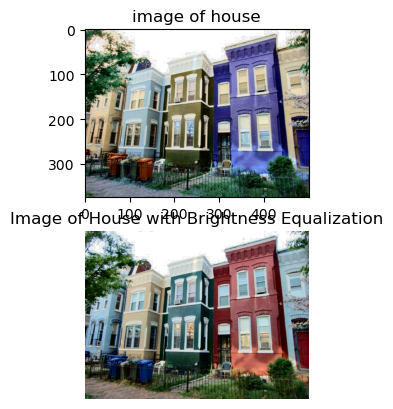

In [13]:
path_house = "color_houses.jpg"
image_house =  cv2.imread(path_house)

yuv_house = cv2.cvtColor(image_house, cv2.COLOR_BGR2YCrCb)

# gray_img = img
reg_eq_yuv_house = yuv_house
print(reg_eq_yuv_house.shape)
reg_eq_yuv_house[:,:,0] = cv2.equalizeHist(yuv_house[:,:,0])

# regular_yuv = cv2.equalizeHist(yuv_img[:,:,0])
reg_eq_yuv_house = cv2.cvtColor(reg_eq_yuv_house, cv2.COLOR_YCrCb2BGR)

plt.subplot(2, 1, 1)
plt.title('image of house')
plt.imshow(reg_eq_yuv_house)

path_house = "color_houses.jpg"
image_house = cv2.imread(path_house)

# Convert the image to LAB color space
lab_house = cv2.cvtColor(image_house, cv2.COLOR_BGR2LAB)

# Apply histogram equalization to the L channel
l, a, b = cv2.split(lab_house)
l_eq = cv2.equalizeHist(l)
lab_eq_house = cv2.merge((l_eq, a, b))

# Convert the image back to BGR color space
reg_eq_lab_house = cv2.cvtColor(lab_eq_house, cv2.COLOR_LAB2BGR)

# Display the result
plt.subplot(2, 1, 2)
plt.title('Image of House with Brightness Equalization')
plt.imshow(cv2.cvtColor(reg_eq_lab_house, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



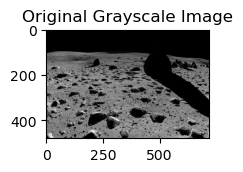

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(gray_img.shape)
plt.subplot(3, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_img, cmap='gray')

(202370,) (480, 720)


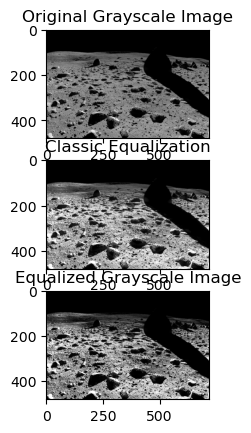

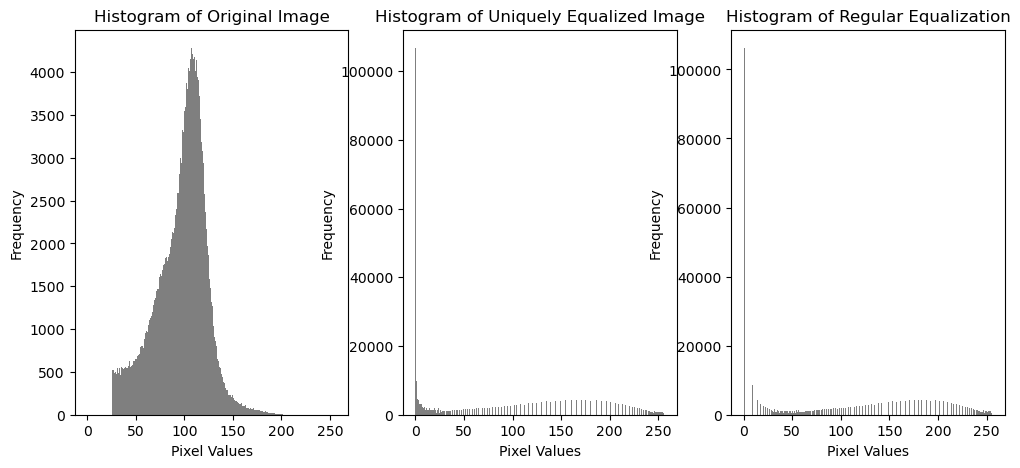

In [15]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# gray_img = img
reg_eq_img = cv2.equalizeHist(gray_img)
# print(gray_img)

# Step 3: Apply histogram equalization
# Create a mask for pixels above the threshold
mask = gray_img > 25

equalized_img = np.copy(gray_img)
equalized_pixels = cv2.equalizeHist(gray_img[mask].reshape(-1))
print(equalized_img[mask].shape, equalized_img.shape)
equalized_img[mask] = equalized_pixels.reshape(-1)

plt.subplot(3, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_img, cmap='gray')

plt.subplot(3, 1, 2)
plt.title('Classic Equalization')
plt.imshow(reg_eq_img, cmap='gray')

plt.subplot(3, 1, 3)
plt.title('Equalized Grayscale Image')
plt.imshow(equalized_img, cmap='gray')

plt.show()


# Plot the histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title('Histogram of Original Image')
plt.hist(gray_img[mask].ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.title('Histogram of Uniquely Equalized Image')
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.title('Histogram of Regular Equalization')
plt.hist(reg_eq_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.show()



(480, 720)
(480, 360)


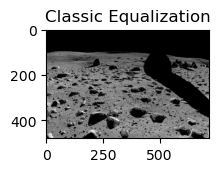

In [16]:
print(gray_img.shape)
print(gray_img[:,::2].shape)

plt.subplot(3, 1, 2)
plt.title('Classic Equalization')
plt.imshow(gray_img,cmap='gray')

(480, 720)
(240, 360)


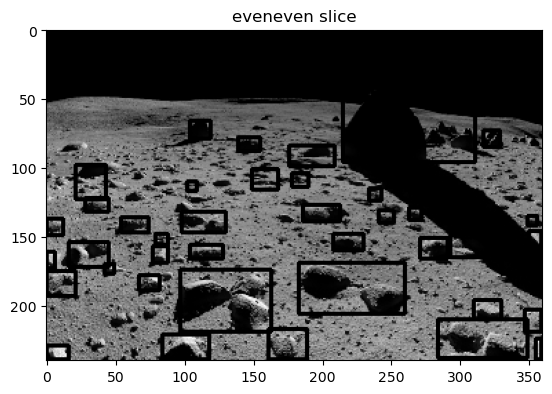

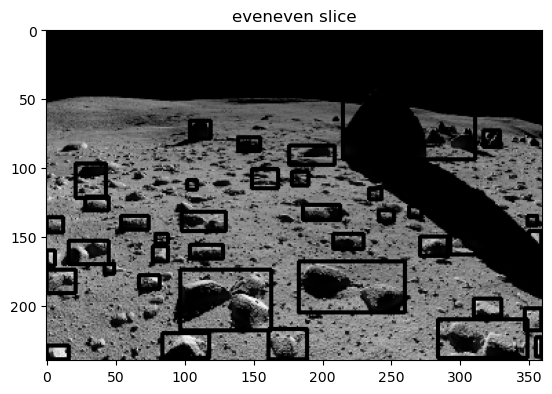

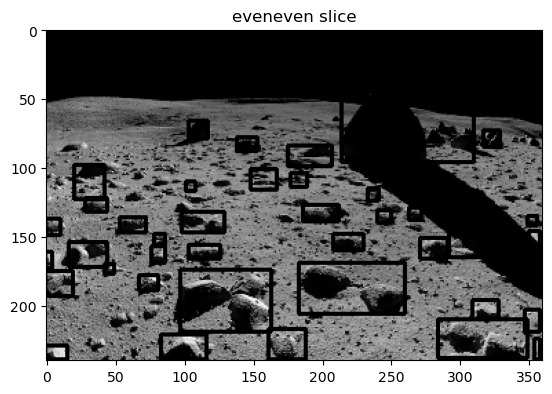

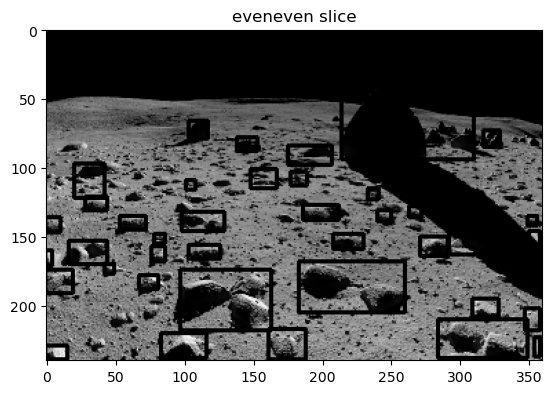

In [17]:

def adjust_sliced_boxes(bboxes, slice_type):
    adjusted_bboxes = []
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox
        if slice_type == 'eveneven':
            adjusted_bbox = [x_min//2, y_min//2, x_max//2, y_max//2]
        elif slice_type == 'evenodd':
            adjusted_bbox = [x_min//2, (y_min-1)//2, x_max//2, (y_max-1)//2]
        elif slice_type == 'oddeven':
            adjusted_bbox = [(x_min-1)//2, y_min//2, (x_max-1)//2, y_max//2]
        elif slice_type == 'oddodd':
            adjusted_bbox = [(x_min-1)//2, (y_min-1)//2, (x_max-1)//2, (y_max-1)//2]
        adjusted_bboxes.append(adjusted_bbox)
    return adjusted_bboxes

# bboxes = [relative_to_absolute(bbox[1:], img.shape) for bbox in img]
slice_types = ['eveneven', 'evenodd', 'oddeven', 'oddodd']


print(gray_img.shape)

# first refers to column wise, second refers to row wise
eveneven_img = gray_img[:, ::2][::2, :]
evenodd_img = gray_img[:, ::2][1::2, :]
print(eveneven_img.shape)

oddeven_img = gray_img[:, 1::2][::2, :]
oddodd_img = gray_img[:, 1::2][1::2, :]


adjusted_ee_bboxes = adjust_sliced_boxes(bboxes, slice_types[0]) 
image_with_bboxes = draw_bounding_boxes(eveneven_img.copy(), adjusted_ee_bboxes)
plt.imshow(image_with_bboxes, cmap='gray')
plt.title(f'{slice_types[0]} slice')
plt.show()

adjusted_eo_bboxes = adjust_sliced_boxes(bboxes, slice_types[1]) 
image_with_bboxes = draw_bounding_boxes(eveneven_img.copy(), adjusted_eo_bboxes)
plt.imshow(image_with_bboxes, cmap='gray')
plt.title(f'{slice_types[0]} slice')
plt.show()

adjusted_oe_bboxes = adjust_sliced_boxes(bboxes, slice_types[2]) 
image_with_bboxes = draw_bounding_boxes(eveneven_img.copy(), adjusted_oe_bboxes)
plt.imshow(image_with_bboxes, cmap='gray')
plt.title(f'{slice_types[0]} slice')
plt.show()

adjusted_oo_bboxes = adjust_sliced_boxes(bboxes, slice_types[3]) 
image_with_bboxes = draw_bounding_boxes(eveneven_img.copy(), adjusted_oo_bboxes)
plt.imshow(image_with_bboxes, cmap='gray')
plt.title(f'{slice_types[0]} slice')
plt.show()


### Performing Warping Augmentation Technique

(-0.5, 719.5, 479.5, -0.5)

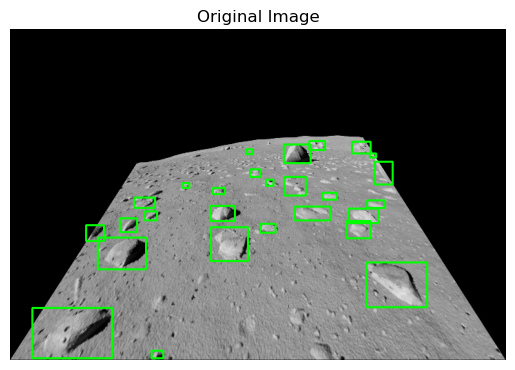

In [60]:
def warp_bounding_boxes(bboxes, T):
    adjusted_bboxes = []
    for bbox in bboxes:
        x_min, y_min, width, height = bbox
        x_max = x_min + width
        y_max = y_min + height
        
        # Define source points in the format expected by cv2.perspectiveTransform
        src_points = np.float32([[x_min, y_min], [x_max, y_min], [x_min, y_max], [x_max, y_max]])
        
        # Warp the source points
        warped_points = cv2.perspectiveTransform(src_points.reshape(-1, 1, 2), T)
        
        # Extract the min and max coordinates
        x_min_warped = warped_points[:, :, 0].min()
        y_min_warped = warped_points[:, :, 1].min()
        x_max_warped = warped_points[:, :, 0].max()
        y_max_warped = warped_points[:, :, 1].max()
        
        # Calculate width and height
        width_warped = x_max_warped - x_min_warped
        height_warped = y_max_warped - y_min_warped
        
        # Create the warped bounding box in (x, y, width, height) format
        warped_bbox = [x_min_warped, y_min_warped, width_warped, height_warped]
        adjusted_bboxes.append(warped_bbox)
    
    return adjusted_bboxes



# def warp_bounding_boxes(bboxes, T):
#     adjusted_bboxes = []
#     for bbox in bboxes:
#         x_min, y_min, width, height = bbox
#         x_max = x_min + width
#         y_max = y_min + height
#         src_points = np.float32([[x_min, y_min], [x_max, y_min], [x_min, y_max], [x_max, y_max], [x_min, y_min]])
#         warped_points = cv2.perspectiveTransform(src_points.reshape(-1, 1, 2), T)
#         warped_bbox = [
#             warped_points[:, :, 0].min(),  # x_min
#             warped_points[:, :, 1].min(),  # y_min
#             warped_points[:, :, 0].max(),  # x_max
#             warped_points[:, :, 1].max()   # y_max
#         ]
#         width_warped = x_max_warped - x_min_warped
#         height_warped = y_max_warped - y_min_warped
        
#         # Create the warped bounding box in (x, y, width, height) format
#         warped_bbox = [x_min_warped, y_min_warped, width_warped, height_warped]
#         adjusted_bboxes.append(warped_bbox)
    
#     return adjusted_bboxes


def perspective_transformation(image, bboxes):
    if len(image.shape) == 3:  # Check for color image
        rows, cols, _ = image.shape
    elif len(image.shape) == 2:  # Check for grayscale image
        rows, cols = image.shape
    else:
        raise ValueError("Unsupported image format")

    # Perspective Transformation
    src_points = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
    dst_points = np.float32([[cols*0.3, rows*0.3], [cols*0.7, rows*0.3], [0, rows], [cols, rows]])
    T = cv2.getPerspectiveTransform(src_points, dst_points)
    warped_image = cv2.warpPerspective(image, T, (cols, rows))

    warped_bboxes = warp_bounding_boxes(bboxes, T)
    clipping_ranges = [(0, 720), (0, 720), (0, 480), (0, 720)]
    
    warped_bboxes_clipped = [[int(np.clip(coord, *clipping_ranges[i])) for i, coord in enumerate(bbox)] for bbox in warped_bboxes]

    # Crop the warped image
    x_min = int(dst_points[0][0])
    x_max = int(dst_points[1][0])
    y_min = int(dst_points[0][1])
    y_max = int(dst_points[2][1])
    
    # cropped_warped_image = warped_image[y_min:y_max, x_min:x_max]

    plt.imshow(warped_image, cmap='gray')
    plt.axis('off')
    
    return warped_image, warped_bboxes_clipped


warped_image, warped_bboxes = perspective_transformation(img.copy(), bboxes)



plt.subplot(1, 1, 1)
plt.title('Original Image')
image_with_bboxes = draw_bounding_boxes(warped_image.copy(), warped_bboxes)
plt.imshow(image_with_bboxes, cmap='gray')
plt.axis('off')

In [62]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the function for adjusting bounding boxes
# def warp_bounding_boxes(bboxes, T):
#     adjusted_bboxes = []
#     for bbox in bboxes:
#         x_min, y_min, x_max, y_max = bbox
#         src_points = np.float32([[x_min, y_min], [x_max, y_min], [x_min, y_max], [x_max, y_max], [x_min, y_min]])
#         warped_points = cv2.perspectiveTransform(src_points.reshape(-1, 1, 2), T)
#         warped_bbox = [
#             warped_points[:, :, 0].min(),  # x_min
#             warped_points[:, :, 1].min(),  # y_min
#             warped_points[:, :, 0].max(),  # x_max
#             warped_points[:, :, 1].max()   # y_max
#         ]
#         adjusted_bboxes.append(warped_bbox)
#     return adjusted_bboxes

# def perspective_transformation(image, bboxes):
#     if len(image.shape) == 3:  # Check for color image
#         rows, cols, _ = image.shape
#     elif len(image.shape) == 2:  # Check for grayscale image
#         rows, cols = image.shape
#     else:
#         raise ValueError("Unsupported image format")
        
#     # Perspective Transformation
#     src_points = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
#     dst_points = np.float32([[cols*0.2, rows*0.5], [cols*0.8, rows*0.5], [0, rows], [cols, rows]])
#     T = cv2.getPerspectiveTransform(src_points, dst_points)
#     warped_image = cv2.warpPerspective(image, T, (cols, rows))

#     warped_bboxes = warp_bounding_boxes(bboxes, T)



#     # Crop the warped image
#     x_min = int(dst_points[0][0])
#     x_max = int(dst_points[1][0])
#     y_min = int(dst_points[0][1])
#     y_max = int(dst_points[2][1])
    
#     cropped_warped_image = warped_image[y_min:y_max, x_min:x_max]
    

    
#     return cropped_warped_image, warped_bboxes





# # Assuming gray_img is defined somewhere before this point
# warped_image, warped_bboxes = perspective_transformation(img, bboxes)

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# image_with_bboxes = draw_bounding_boxes(gray_img.copy(), bboxes)
# plt.imshow(image_with_bboxes, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Warped Image')


# clipping_ranges = [(0, 240), (0, 432), (0, 240), (0, 432)]
# warped_bboxes = [[int(np.clip(coord, *clipping_ranges[i])) for i, coord in enumerate(bbox)] for bbox in warped_bboxes]


# warp_with_bboxes = draw_bounding_boxes(warped_image.copy(), warped_bboxes)
# plt.imshow(warp_with_bboxes)
# plt.axis('off')

# plt.show()

In [71]:
def adjust_sliced_boxes(bboxes, slice_type):
    adjusted_bboxes = []
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox
        if slice_type == 'eveneven':
            adjusted_bbox = [x_min//2, y_min//2, x_max//2, y_max//2]
        elif slice_type == 'evenodd':
            adjusted_bbox = [x_min//2, (y_min-1)//2, x_max//2, (y_max-1)//2]
        elif slice_type == 'oddeven':
            adjusted_bbox = [(x_min-1)//2, y_min//2, (x_max-1)//2, y_max//2]
        elif slice_type == 'oddodd':
            adjusted_bbox = [(x_min-1)//2, (y_min-1)//2, (x_max-1)//2, (y_max-1)//2]
        adjusted_bboxes.append(adjusted_bbox)
    return adjusted_bboxes

def slice_image(image, slice_type):
    if slice_type == 'eveneven':
        return image[:, ::2][::2, :]
    elif slice_type == 'evenodd':
        return image[:, ::2][1::2, :]
    elif slice_type == 'oddeven':
        return image[:, 1::2][::2, :]
    elif slice_type == 'oddodd':
        return image[:, 1::2][1::2, :]

### Final Dataset Generation

In [82]:
csv_file = "bbox_data.csv"  # Replace with your CSV file path
original_dataset_path = 'dataset/original_dataset/images/render/'
output_dataset_paths = ['dataset/histogram_equalization/', 'dataset/pixel_pooling/', 'dataset/image_warp/']

data = pd.read_csv(csv_file, header=0)
grouped_df = data.groupby(data.columns[0])

bbox_data = []


pooling_paths = ["eveneven", "evenodd", "oddeven", "oddodd"]


# for idx, group_name in enumerate(grouped_df.groups.keys()):

for idx, group_name in enumerate(grouped_df.groups.keys()):
    if idx == 300:
        break  # Break the loop after 300 images

    img_path = os.path.join(original_dataset_path,group_name)
    img_new = cv2.imread(img_path)
    img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)

    bboxes = []

    ################# HISTOGRAM EQUALIZATION #######################
    # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # mask = gray_img > 25
    # equalized_img = np.copy(gray_img)
    # equalized_pixels = cv2.equalizeHist(gray_img[mask].reshape(-1))
    # equalized_img[mask] = equalized_pixels.reshape(-1)
    

    bboxes = []
    for bbox in grouped_df.get_group(group_name).values:
        bboxes.append(relative_to_absolute(bbox[1:], img_new.shape))


    for slice_type in pooling_paths:

        sliced_img = slice_image(img_new, slice_type)
        adjusted_bboxes = adjust_sliced_boxes(bboxes, slice_type)

        output_img_name = os.path.join(slice_type + group_name)
        output_img_path = os.path.join(output_dataset_paths[1], output_img_name)
        cv2.imwrite(output_img_path, sliced_img)

        for bbox in adjusted_bboxes:
            x, y, w, h = bbox
            center_x = x + w / 2
            center_y = y + h / 2

            img_width = sliced_img.shape[1]
            img_height = sliced_img.shape[0]

            # Normalize coordinates by image dimensions
            center_x /= img_width
            center_y /= img_height
            w /= img_width
            h /= img_height
            img_short_path = output_img_name

            bbox_data.append({
                'image': img_short_path,
                'center_x': center_x,
                'center_y': center_y,
                'width': w,
                'height': h
            })

output_csv_path = os.path.join(output_dataset_paths[1], 'bounding_boxes.csv')
bbox_df = pd.DataFrame(bbox_data)
bbox_df.to_csv(output_csv_path, index=True)


    # warped_image, warped_bboxes = perspective_transformation(img_new.copy(), bboxes)

    # plt.imshow(warped_image)
    # plt.axis('off')

    # plt.show()




    # for bbox in warped_bboxes:    
            
    #     x, y, w, h = bbox
    #     center_x = x + w / 2
    #     center_y = y + h / 2

    #     img_width = img.shape[1]
    #     img_height = img.shape[0]

    #     # Normalize coordinates by image dimensions
    #     center_x /= img_width
    #     center_y /= img_height
    #     w /= img_width
    #     h /= img_height
    #     img_short_path = group_name

    #     bbox_data.append({
    #         'image': group_name,
    #         'center_x': center_x,
    #         'center_y': center_y,
    #         'width': w,
    #         'height': h
    #     })
    #     # bboxes.append(relative_to_absolute(bbox[1:], img.shape))

    # # adjusted_bboxes = relative_to_absolute(bboxes, img.shape)
    # # adjusted_bboxes = adjust_sliced_boxes(bboxes, 'eveneven')



    # ############ CHANGE THIS VARIABLE TO MAKE SURE THAT CHOOSE THE CORRECT FOLDER
    # output_img_path = output_dataset_paths[2] + group_name
    # output_csv_path = output_dataset_paths[2] + 'bounding_boxes.csv'
    

    # # Save the augmented image and adjusted bounding boxes
    # cv2.imwrite(output_img_path, warped_image)
    # # adjusted_bboxes.insert(0, group_name)


    
# bbox_df = pd.DataFrame(bbox_data)
# bbox_df.to_csv(output_csv_path, index=True)
# # pd.DataFrame(adjusted_bboxes).to_csv(output_csv_path, header=True, index=False)